In [1]:
import os
import gdcm
import pydicom
import cv2 as cv
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

from dicom2stl.examples import gui

from pydicom import dcmread, dcmwrite
from pydicom.data import get_testdata_file
from skimage import feature, filters
from skimage.filters import roberts, sobel, scharr, prewitt

from pydicom.uid import ExplicitVRLittleEndian

%matplotlib notebook

In [2]:
path = "pos_twist_05iso_37"

In [3]:
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(path)
reader.SetFileNames(dicom_names)
image = reader.Execute()

size = image.GetSize()
size

(192, 512, 120)

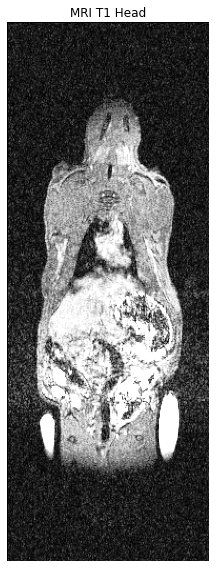

In [4]:
gui.MultiImageDisplay(image_list=[image], title_list=['MRI T1 Head'])

In [17]:
#Convert image to nii.gz file format
#sitk.WriteImage(image, "test.nii.gz")

In [18]:
#sitk.Show(image, "Dicom Series")

In [5]:
mri_image = sitk.ReadImage('test.nii.gz')


gui.MultiImageDisplay(image_list=[mri_image], title_list=['MRI T1 Head'])

KeyboardInterrupt: 

In [ ]:
full_image = []
for file in os.listdir(path):
    f = os.path.join(path, file)
    # checking if it is a file
    if os.path.isfile(f):
        ds = dcmread(f)
        full_image.append(feature.canny(ds.pixel_array,sigma=0.01))

In [6]:
ds = dcmread('pos_twist_05iso_37/IM-0001-0081.dcm')

In [7]:
ds.file_meta.TransferSyntaxUID

'1.2.840.10008.1.2.4.90'

In [8]:
ds.pixel_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1, 45, ..., 40, 59, 11],
       [ 0, 23, 42, ..., 36, 26, 11],
       ...,
       [ 0, 16, 22, ..., 50, 21, 26],
       [ 0, 53, 31, ..., 19, 18, 42],
       [ 0, 43, 25, ..., 17, 31,  3]], dtype=uint16)

In [ ]:
ds.pixel_array

In [257]:
test = prewitt(ds.pixel_array)
test = test>0.00064
test = test.astype(np.uint8)
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [258]:
np.count_nonzero(np.array(test))

6802

In [271]:
noise = cv.fastNlMeansDenoising(ds.pixel_array.astype(np.uint8))

<IPython.core.display.Javascript object>


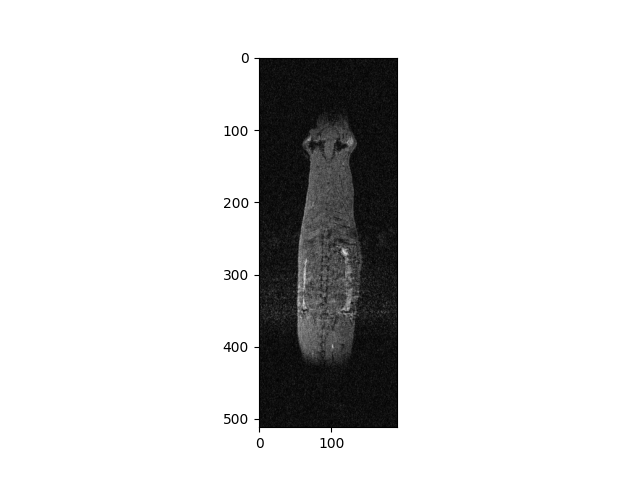

In [273]:
plt.imshow(ds.pixel_array, cmap="gray")

In [233]:
def save_dicom_file(original_file, new_array, file_path):

    original_file.file_meta.TransferSyntaxUID = ExplicitVRLittleEndian
    original_file.PixelData = new_array.tobytes()
    original_file.save_as(file_path)

In [236]:
ds.save_as("test.dcm")

In [237]:
ds = dcmread('test.dcm')

In [238]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [239]:
ds.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [240]:
plt.imshow(ds.pixel_array, cmap="gray")

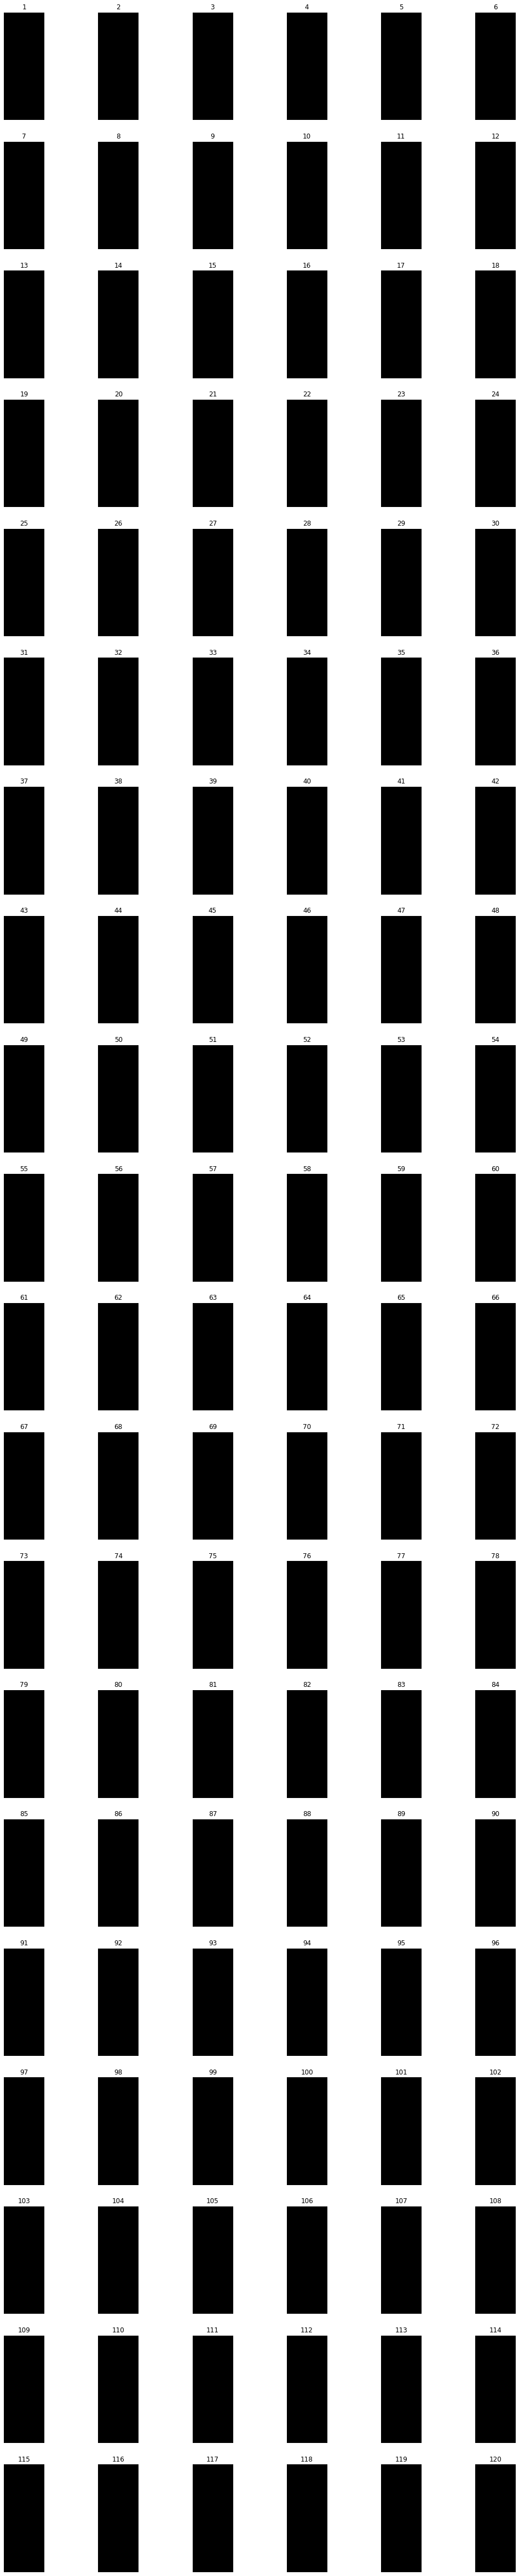

In [18]:
fig = plt.figure(figsize=(18, 86))
#fig = plt.figure()

for i in range(len(full_image)):
    fig.add_subplot(20, 6, i+1)

    # showing image
    plt.imshow(full_image[i], cmap="gray")
    plt.axis('off')
    plt.title(str(i+1))

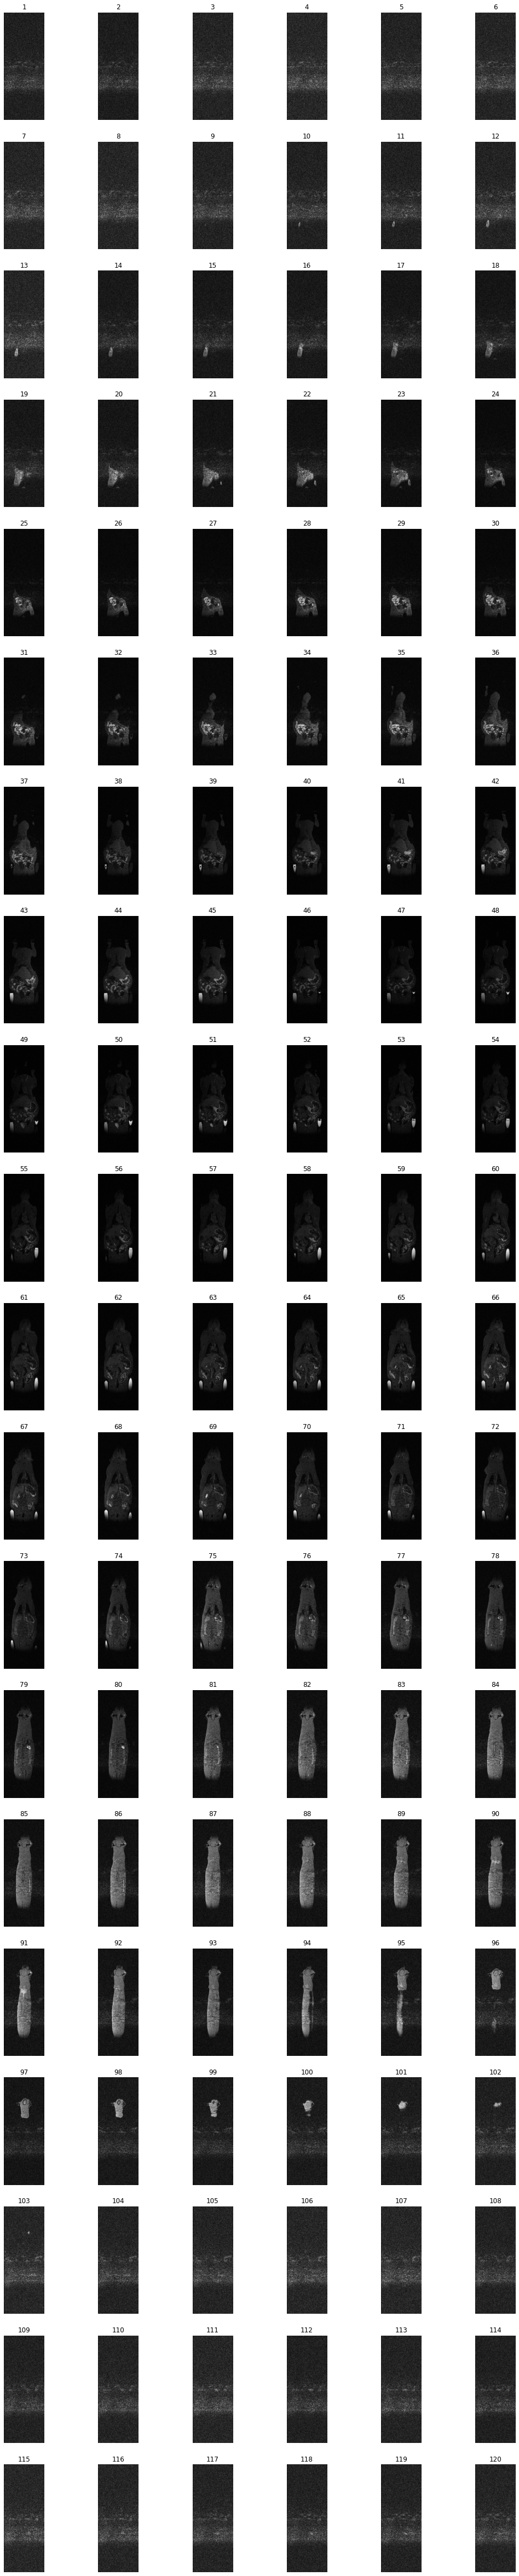

In [8]:
fig = plt.figure(figsize=(18, 86))
#fig = plt.figure()

for i in range(len(full_image)):
    fig.add_subplot(20, 6, i+1)

    # showing image
    plt.imshow(full_image[i], cmap="gray")
    plt.axis('off')
    plt.title(str(i+1))